<h1>Human Resources Analytics 

<h2> Objective

Explore to see if we can conduct an EDA ( Explanotory Data Analysis) with Python on HR available data in order to examine various corellations, data patterns and summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us and possibly formulate hypotheses that could lead to new data collection and experiments.

So in this small EDA example we wil try to work on the following mock scenario:

Understand what factors contributed most to employee turnover examine correllations and if possibly create a model that can predict if a certain employee will leave the company or not. The goal is to create or improve different retention strategies on targeted employees. Overall, the implementation of this model will allow management to create better decision-making actions.

In [1]:
from IPython.display import Image
Image(url="source.gif")   


I’ll be following a typical data analysis pipeline which can be described in the following steps 

1) Obtaining the data is the first approach in solving the problem.

2) Scrubbing or cleaning the data is the next step. This includes data imputation of missing or invalid data and fixing column names.

3) Exploring the data will follow right after and allow further insight of what our dataset contains. Looking for any outliers or weird data. Understanding the relationship between variables resides here 

3)Modeling the data will give us our predictive power on whether an employee will leave.

4) Interpreting the data is last. With all the results and analysis of the data, what conclusion is made? What factors contributed most to employee turnover? What relationship of variables were found?

<h6>Note:> The data  was based on a dataset that was provided to me as part of a current training course on Business Analytics https://www.edx.org/micromasters/business-analytics which i modified a bit in order to fit Printec Structure 

In [2]:
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
 
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')


<h2> Part 1: Obtaining the Data

In [2]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
#Read the analytics xlsx file and store our dataset into a dataframe called "df" and present a few rows 
df=pd.read_excel("HR_data.xlsx")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,Department,salary,HRMS
0,0.38,0.53,2,157,3,1,0,sales,low,EMP224
1,0.80,0.86,5,262,6,1,0,sales,medium,EMP233
2,0.11,0.88,7,272,4,1,0,sales,medium,EMP264
3,0.72,0.87,5,223,5,0,0,sales,low,EMP1383
4,0.37,0.52,2,159,3,1,0,sales,low,EMP1424
5,0.41,0.50,2,153,3,1,0,sales,low,EMP682
6,0.10,0.77,6,247,4,1,0,sales,low,EMP109
7,0.92,0.85,5,259,5,1,0,sales,low,EMP780
8,0.89,1.00,5,224,5,1,0,sales,low,EMP420
9,0.42,0.53,2,142,3,1,0,sales,low,EMP3


<h2>variable description

satisfaction_level: Level of employee satisfaction measured from 0 to 1.

last_evaluation: Employee score on the perfomance  last evaluation measured from 0 to 1.

number_project: Employee participation in company's projects

average_montly_hours: Average monthly hours at workplace.

time_spend_company: Numbers of years in the company.

left: Whether the employee left the workplace or not ( 1=left , 0=stayed).

promotion_last_5years: Whether the employee was promoted in the last five years. (1=promoted , 0=not promoted).

Department: Employee Department.

Salary: Relative level of salary.

HRMS: Employee code in hr management system

<h2> Part 2: Cleaning the data

In [5]:
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
 
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')


Data cleaning requires a lot, this dataset is super clean and contains no missing values. But still, we will  have to examine the dataset to make sure that everything else is readable and that the observation values match the feature names appropriately.

Check to see if there are any missing values in our data set

In [4]:
# Check to see if there are any missing values in our data set
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
left                     False
promotion_last_5years    False
Department               False
salary                   False
HRMS                     False
dtype: bool

Check the type of data we have

In [5]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
HRMS                      object
dtype: object

In [6]:
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'Employee Satisfaction', 
                        'last_evaluation': 'Performance Score',
                        'number_project': 'Projects',
                        'average_montly_hours': 'Average Monthly Hours',
                        'time_spend_company': 'Years At Company',
                        
                        'promotion_last_5years': 'Promotion',
                        'Department' : 'Department',
                        'left' : 'Left',
                        'salary':'Salary Level'
                        })

Renaming certain columns for better readability

In [7]:
df.head()

,Employee Satisfaction,Performance Score,Projects,Average Monthly Hours,Years At Company,Left,Promotion,Department,Salary Level,HRMS
0,0.38,0.53,2,157,3,1,0,sales,low,EMP224
1,0.80,0.86,5,262,6,1,0,sales,medium,EMP233
2,0.11,0.88,7,272,4,1,0,sales,medium,EMP264
3,0.72,0.87,5,223,5,0,0,sales,low,EMP1383
4,0.37,0.52,2,159,3,1,0,sales,low,EMP1424


Move the response variable "left" to the front of the table

In [8]:
 #Move the response variable "left" to the front of the table
front = df['Left']
df.drop(labels=['Left'], axis=1,inplace = True)
df.insert(0, 'Left', front)
df.head()


,Left,Employee Satisfaction,Performance Score,Projects,Average Monthly Hours,Years At Company,Promotion,Department,Salary Level,HRMS
0,1,0.38,0.53,2,157,3,0,sales,low,EMP224
1,1,0.80,0.86,5,262,6,0,sales,medium,EMP233
2,1,0.11,0.88,7,272,4,0,sales,medium,EMP264
3,0,0.72,0.87,5,223,5,0,sales,low,EMP1383
4,1,0.37,0.52,2,159,3,0,sales,low,EMP1424


<h2> Part 3: Exploring the Data

<h3> Descriptive Statistics

In [11]:
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
 
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

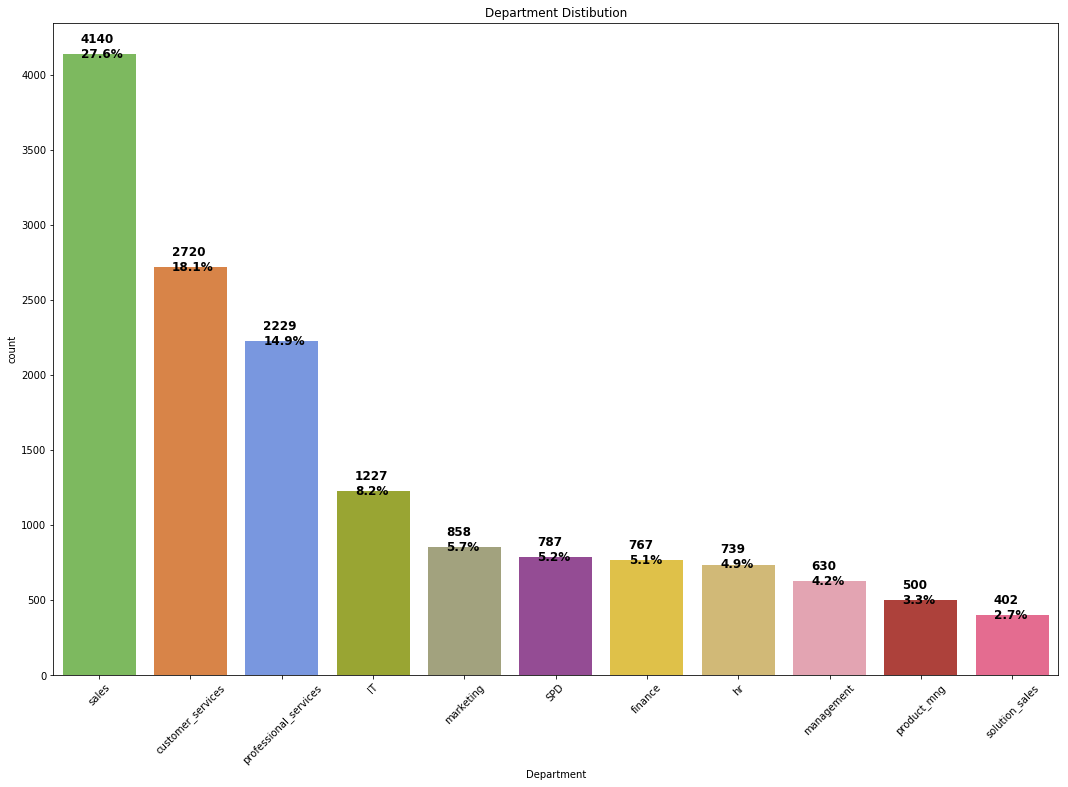

In [9]:
def annotate_bars(bar_plt, bar_plt_var, by=None, x_offset=0, y_offset=0, txt_color="white", fnt_size=12, fnt_weight='bold'):
    if by is None:
        for p in bar_plt.patches:
            bar_plt.annotate(str( int(p.get_height()) ) + "\n" + str(round( (100.0* p.get_height()) /bar_plt_var.count(), 1) )+ "%", 
                             (p.get_x() + x_offset, p.get_height()-y_offset),
                             color=txt_color, fontsize=fnt_size, fontweight=fnt_weight)
    else:
        grouped = bar_plt_var.groupby(by)
        for p in bar_plt.patches:            
            #This part is tricky. The problem is that not each x-tick gets drawn in order, i.e. yes/no of the first group 
            #then yes/no of the second group located on the next tick, but rather all the yes on all the x-ticks get drawn first
            # then all the nos next. So we need to know we are using a patch that belongs to which tick (the x-tick) ultimately
            #refers to one of the groups. So, we get the x absolute coordinate, round it to know this patch is closest to which tick
            #(Assuming that it will always belong to its closest tick), then get the group count of that tick and use it as a total
            #to compute the percentage.
            total = grouped.get_group(bar_plot.get_xticks()[int(round(p.get_x()))]).count()
            bar_plt.annotate(str( int(p.get_height()) ) + "\n" + str(round( (100.0* p.get_height()) /total, 1) )+ "%", 
                             (p.get_x() + x_offset, p.get_height()-y_offset),
                             color=txt_color, fontsize=fnt_size, fontweight=fnt_weight)
plt.figure(figsize=(18,12))
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']
department_plt = sns.countplot(x='Department',data=df, order =df['Department'].value_counts().index, palette=color_types)
annotate_bars(bar_plt=department_plt, bar_plt_var=df['Department'], x_offset=0.2, y_offset=25, txt_color="black")
plt.title( 'Department Distibution')
plt.xticks(rotation=45)

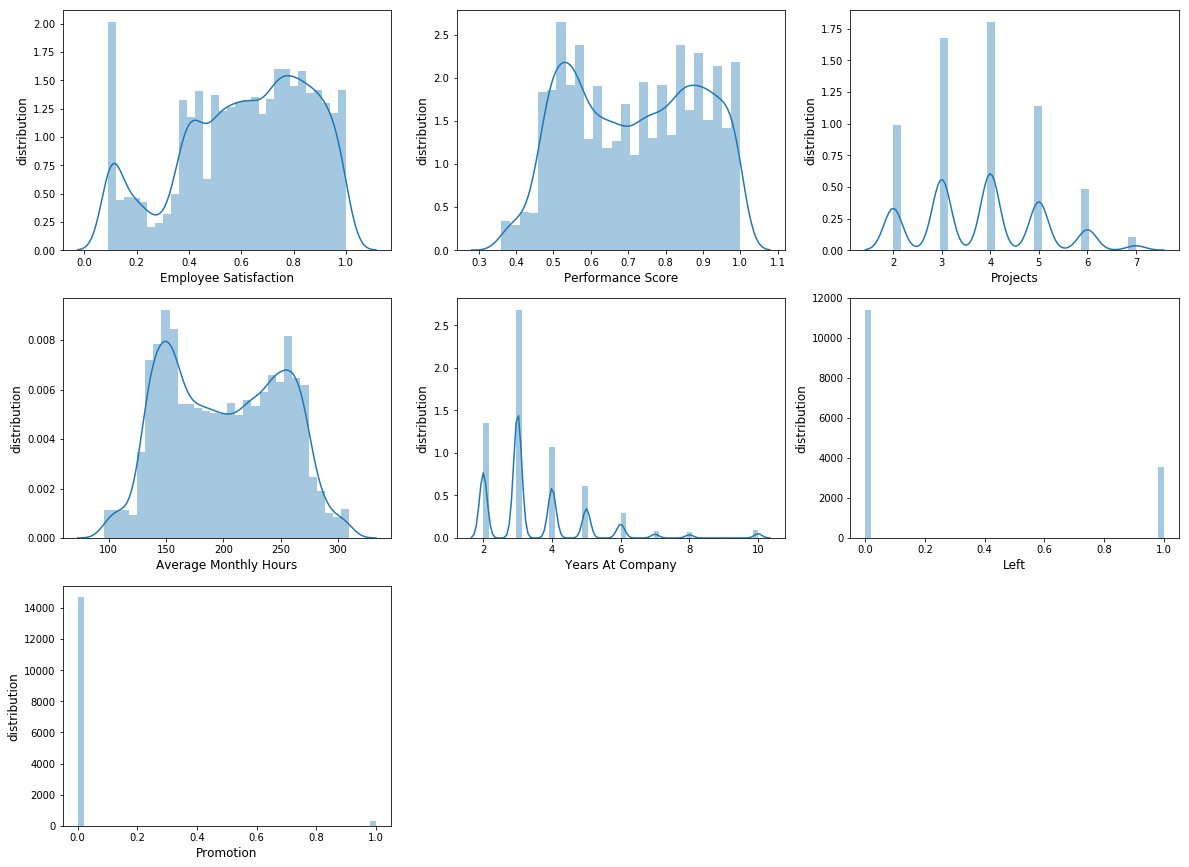

In [10]:
 #histograms
warnings.filterwarnings('ignore')
plt.figure(figsize=[20,15])

plt.subplot(331)
plt.xlabel('Employee Satisfaction', fontsize=12)
plt.ylabel('distribution', fontsize=12)
sns.distplot(df['Employee Satisfaction'])#kde=False)

plt.subplot(332)
plt.xlabel('Performance Score', fontsize=12)
plt.ylabel('distribution', fontsize=12)
sns.distplot(df['Performance Score'])#, kde=False)

plt.subplot(333)
plt.xlabel('Projects', fontsize=12)
plt.ylabel('distribution', fontsize=12)
sns.distplot(df['Projects'])#, kde=False)

plt.subplot(334)
plt.xlabel('Average Monthly Hours', fontsize=12)
plt.ylabel('distribution', fontsize=12)
sns.distplot(df['Average Monthly Hours'])#, kde=False)

plt.subplot(335)
plt.xlabel('Years At Companyy', fontsize=12)
plt.ylabel('distribution', fontsize=12)
sns.distplot(df['Years At Company'])#, kde=False)


plt.subplot(336)
plt.xlabel('Left', fontsize=12)
plt.ylabel('distribution', fontsize=12)
sns.distplot(df['Left'], kde=False)

plt.subplot(337)
plt.xlabel('Promotion', fontsize=12)
plt.ylabel('distribution', fontsize=12)
sns.distplot(df['Promotion'], kde=False)
#plt.tight_layout()

In [11]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Left,14999.0,0.238016,0.425883,0.00,0.00,0.00,0.00,1.0
Employee Satisfaction,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
Performance Score,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
Projects,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
Average Monthly Hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
Years At Company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Promotion,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [12]:
 #Create a Pandas Excel writer using XlsxWriter as the engine.
#writer = pd.ExcelWriter('stats.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
#writer = pd.ExcelWriter('stats.xlsx', engine='xlsxwriter')
#df.describe().T.style.to_excel(writer, sheet_name='Sheet1')

 #Close the Pandas Excel writer and output the Excel file.
#writer.save()

The dataset has:

About ***15,000*** employee observations and ***9 features*** of which ***6 numerical*** features and ***2 categorical*** features (department and salary level) as we show earlier 2 of the numerical features can be used also as categorical ( promotion , left)

The company had a turnover rate of about ***24%*** (mean figure in the table)

Mean satisfaction of employees is **61%** , Mean Performance is **71%** 

In [13]:
# Looks like about 76% of employees stayed and 24% of employees left. 
# NOTE: When performing cross validation, its important to maintain this turnover ratio
#turnover_rate = df['Left'].value_counts()/len(df)
#turnover_rate

<h3> Turnover Summary (mean values)

In [14]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = df.groupby('Left')
turnover_Summary.mean().T

Left,0,1
Employee Satisfaction,0.666814,0.440020
Performance Score,0.715487,0.718070
Projects,3.786770,3.855182
Average Monthly Hours,199.062298,207.414846
Years At Company,3.380173,3.876190
Promotion,0.026249,0.005322


In [15]:
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
 
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')


<h3> Correllation Matrix All Employess

In [16]:
df.corr()

,Left,Employee Satisfaction,Performance Score,Projects,Average Monthly Hours,Years At Company,Promotion
Left,1.000000,-0.388480,0.006427,0.023637,0.071225,0.144675,-0.061771
Employee Satisfaction,-0.388480,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.025605
Performance Score,0.006427,0.105021,1.000000,0.349333,0.339742,0.131591,-0.008684
Projects,0.023637,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.006064
Average Monthly Hours,0.071225,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.003544
Years At Company,0.144675,-0.100866,0.131591,0.196786,0.127755,1.000000,0.067433
Promotion,-0.061771,0.025605,-0.008684,-0.006064,-0.003544,0.067433,1.000000


In [17]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
#writer = pd.ExcelWriter('corr.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
#writer = pd.ExcelWriter('corr.xlsx', engine='xlsxwriter')
#df.corr().to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
#writer.save()

Text(0.5,1,'Correlation Matrix')

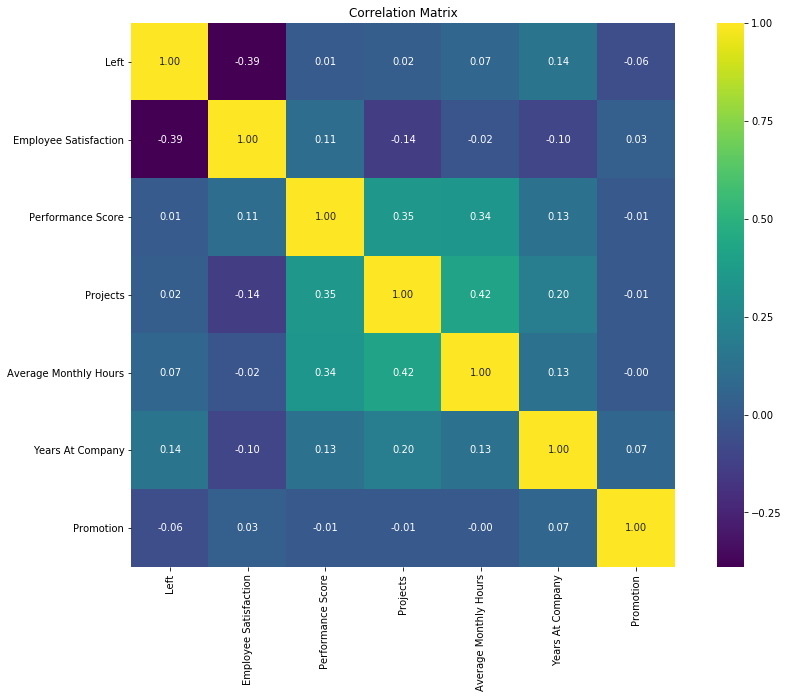

In [18]:
plt.figure(figsize=(15,10))
g = sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap="viridis", square=True) #RdYlGn #"PuOr"
g.set_title("Correlation Matrix")

#Correlation Matrix

#corr = df.corr()
#corr = (corr)
#sns.heatmap(corr, 
            #xticklabels=corr.columns.values,
            #yticklabels=corr.columns.values)
#corr

It seems that employees working hard and with many projects have a better evaluation. (corr(Project,Performance Score) : 0.35, corr(Average Montly Hours,Employee Evaluation) : 0.34 ).

The most important thing in this correlation matrix is the negative correlation between 'Left' and 'Employee Sastisfaction' (-0.39) : employees leave because they are not happy at work ?

Is that the only main reason ? Is there employee patterns that can explained that ?

In [19]:
corrmat_low = df[df['Salary Level'] == 'low'].corr()
corrmat_medium = df[df['Salary Level'] == 'medium'].corr()
corrmat_high = df[df['Salary Level'] == 'high'].corr()

We can see also the correllation Matrix brokendown per Salary Level

<h3> Correllation Matrix Low Salary

In [20]:

corrmat_low

,Left,Employee Satisfaction,Performance Score,Projects,Average Monthly Hours,Years At Company,Promotion
Left,1.000000,-0.407328,-0.000354,0.018077,0.071914,0.217255,-0.017675
Employee Satisfaction,-0.407328,1.000000,0.111067,-0.140360,-0.027853,-0.097104,0.009769
Performance Score,-0.000354,0.111067,1.000000,0.411412,0.384390,0.190196,-0.020720
Projects,0.018077,-0.140360,0.411412,1.000000,0.465718,0.233414,-0.026835
Average Monthly Hours,0.071914,-0.027853,0.384390,0.465718,1.000000,0.174807,-0.018850
Years At Company,0.217255,-0.097104,0.190196,0.233414,0.174807,1.000000,0.024481
Promotion,-0.017675,0.009769,-0.020720,-0.026835,-0.018850,0.024481,1.000000


Text(0.5,1,'Correlation Matrix Low Salary')

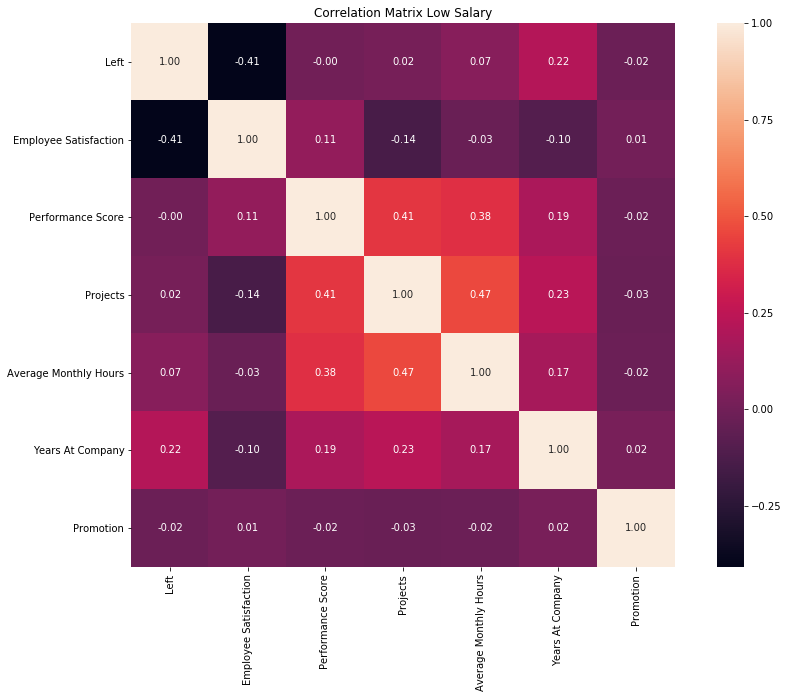

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(corrmat_low, vmax=1.0, square=True,annot=True,fmt='.2f').set_title("Correlation Matrix Low Salary")
#plt.savefig ('Corr_Mat_Low')


It seems that employees with low level Salary working hard and with many projects have a better evaluation. (corr(Project,Performance Score) : 0.41, corr(Average Montly Hours,Employee Evaluation) : 0.38 ).

The most important thing in this correlation matrix is the negative correlation between 'Left' and 'Employee Sastisfaction' (-0.41) : 0.02 points more then the average for All employees



<h3> Correllation Matrix Medium Salary

In [22]:
corrmat_medium 


,Left,Employee Satisfaction,Performance Score,Projects,Average Monthly Hours,Years At Company,Promotion
Left,1.000000,-0.378971,0.021476,0.041830,0.084956,0.121915,-0.074485
Employee Satisfaction,-0.378971,1.000000,0.100942,-0.152540,-0.019287,-0.106088,0.033728
Performance Score,0.021476,0.100942,1.000000,0.309500,0.307234,0.108108,0.006285
Projects,0.041830,-0.152540,0.309500,1.000000,0.396775,0.191024,0.007624
Average Monthly Hours,0.084956,-0.019287,0.307234,0.396775,1.000000,0.111363,0.011225
Years At Company,0.121915,-0.106088,0.108108,0.191024,0.111363,1.000000,0.028833
Promotion,-0.074485,0.033728,0.006285,0.007624,0.011225,0.028833,1.000000


Text(0.5,1,'Correlation Matrix Medium Salary')

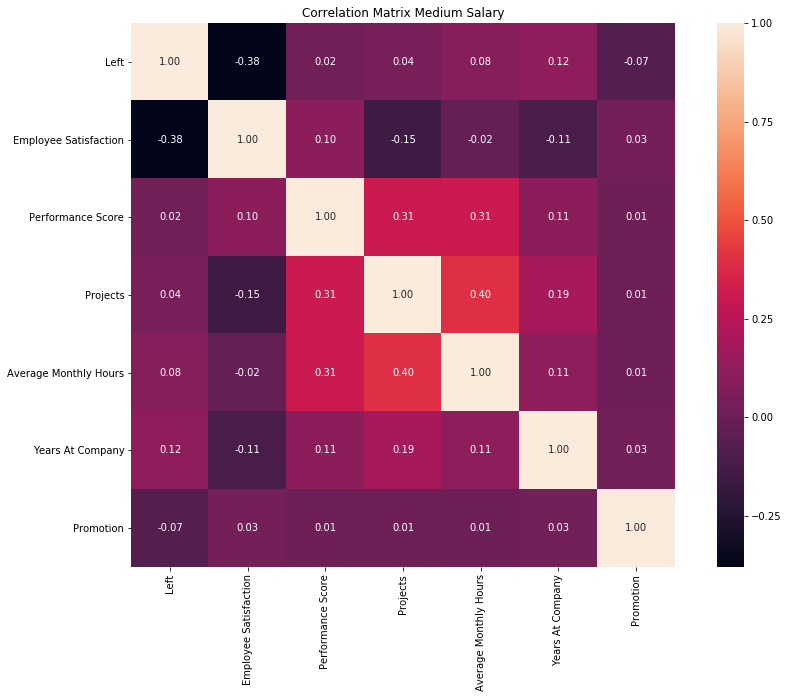

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(corrmat_medium, vmax=1.0, square=True,annot=True,fmt='.2f').set_title("Correlation Matrix Medium Salary")

It seems that employees with Medium level Salary working hard and with many projects have a better evaluation. (corr(Project,Performance Score) : 0.38, corr(Average Montly Hours,Employee Evaluation) : 0.38 ).

The most important thing in this correlation matrix is the negative correlation between 'Left' and 'Employee Sastisfaction' (-0.38) : 0.01 less then the average for All employees



<h3> Correllation Matrix High Salary

In [24]:
corrmat_high

,Left,Employee Satisfaction,Performance Score,Projects,Average Monthly Hours,Years At Company,Promotion
Left,1.000000,-0.238545,-0.101341,-0.077361,-0.037823,-0.001331,-0.066240
Employee Satisfaction,-0.238545,1.000000,0.096584,-0.106296,0.031478,-0.133473,0.009933
Performance Score,-0.101341,0.096584,1.000000,0.124613,0.220674,0.006276,-0.028560
Projects,-0.077361,-0.106296,0.124613,1.000000,0.180278,0.088495,-0.003924
Average Monthly Hours,-0.037823,0.031478,0.220674,0.180278,1.000000,0.015695,-0.019798
Years At Company,-0.001331,-0.133473,0.006276,0.088495,0.015695,1.000000,0.225493
Promotion,-0.066240,0.009933,-0.028560,-0.003924,-0.019798,0.225493,1.000000


Text(0.5,1,'Correlation Matrix High Salary')

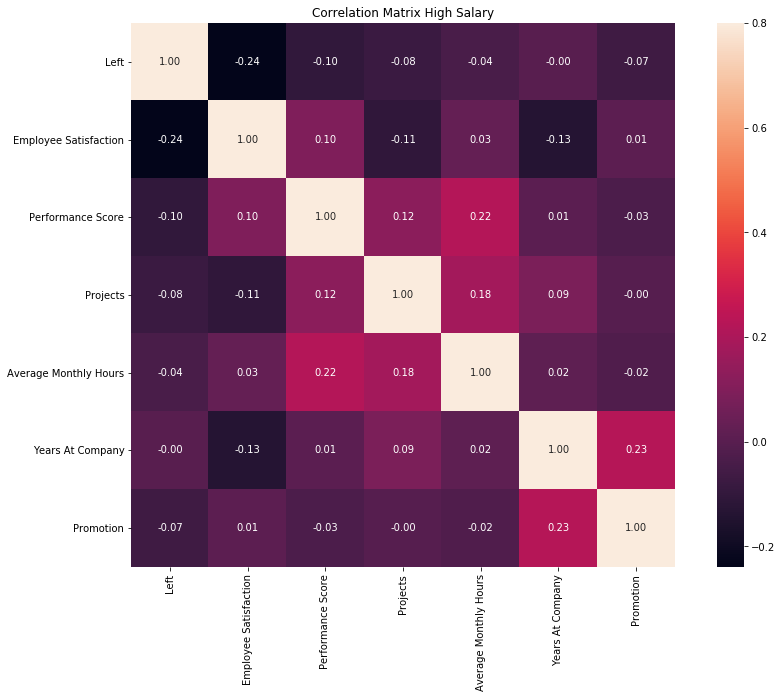

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(corrmat_high, vmax=0.8, square=True,annot=True,fmt='.2f').set_title("Correlation Matrix High Salary")

If we plot the Evaluation Scores vs the Employee Satisfaction of the Employees who left it seems that we have 3 clusters/types of Employees who left. So we can try to validate this using a clustering technigue

Text(0.5,0,'Satisfaction level')

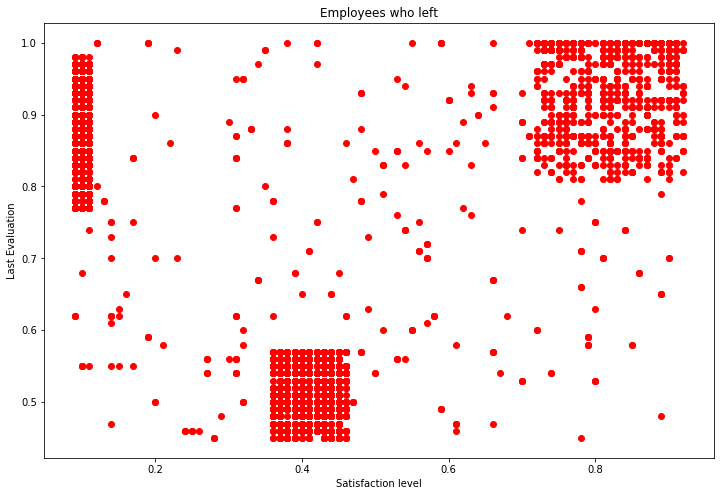

In [26]:
plt.figure(figsize = (12,8))
#lt.subplot(1,2,1)
plt.plot(df['Employee Satisfaction'][df.Left==1],df['Performance Score'][df.Left==1],'ro',alpha=1)
plt.ylabel('Last Evaluation')
plt.title('Employees who left')
plt.xlabel('Satisfaction level')

<h1> K-Means Clustering of Employees who left the company

Clustering  is an unsupervised learning technique . The aim here is to group the data points into clusters such that similar items are lumped together in the same
cluster.A cluster is therefore a collection of objects which are similar between them and are dissimilar to the objects belonging to other clusters.
Clustering is one of the important tools in exploratory analysis.
K-Means is the most popular partitional clustering algorithm (It is considered as one of the top 10 data mining algorithms) .

The algorithm accepts two inputs. The data itself, and "k", the number of clusters. The output is k clusters with input data partitioned among them.

So what we are trying to do : We are grouping the Employees into k clusters based on their performance and satisfaction such that all people in same cluster are as similar to each other (in terms of perfomance and satisfaction) as possible and people not in same cluster are as different as possible. We use the distance measures to calculate similarity and dissimilarity. 
One of the important concept in K-means is that of centroid. Each cluster has a centroid. You can consider it as the point that is most representative of the cluster. Equivalently, centroid is point that is the "center" of a cluster.

## There are 3 distinct clusters for employees who left the company
The cluster centers are the three black exes.

We have three groups which are defined as :


**Cluster 1: Blue (Frustated)**: Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job.

*Question: What could be the reason for feeling so horrible when you are highly evaluated? Could it be working too hard? Could this cluster be used to characterize employees who are "overworked"?*

**Cluster 2: Cyan (Bad Fits)** : Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.

*Question: Could this cluster characterize employees who "under-performed"?*

**Cluster 3: Red (Engaged)** : Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance.

*Question: Could this cluster mean that employees left because they found another job opportunity?*

In [27]:
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
 
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')


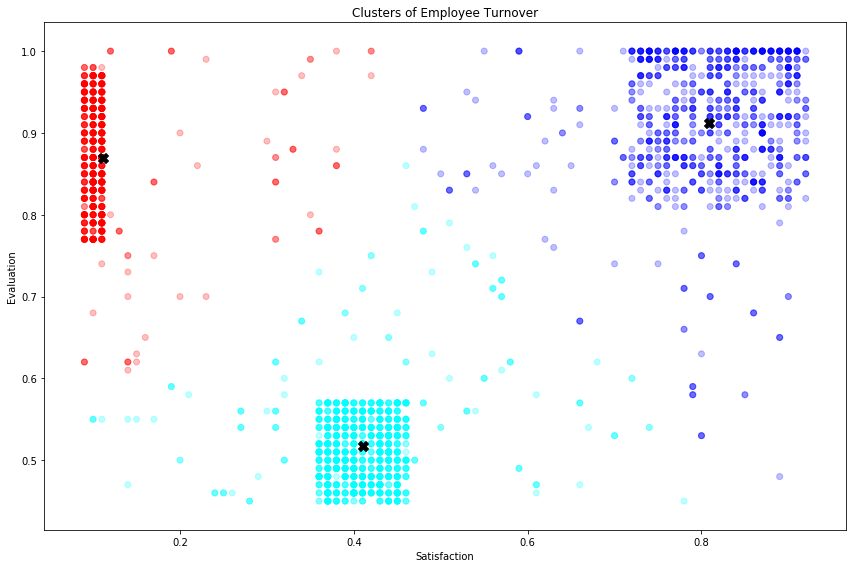

In [28]:
# Import KMeans Model
from sklearn.cluster import KMeans
import seaborn as sns

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=10)
kmeans.fit(df[df.Left==1][['Employee Satisfaction','Performance Score']])

kmeans_colors = ['cyan' if c == 0 else 'blue' if c == 1 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(12, 8))
plt.scatter(x='Employee Satisfaction',y='Performance Score',data=df[df.Left==1],alpha=0.25,color=kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.tight_layout()
plt.show()


In [29]:
leaversdf=df[df.Left==1]#[['Employee Satisfaction','Performance Score','Department','HRMS']]
leaversdf1=df[df.Left==1][['Employee Satisfaction','Performance Score']]


#### Cluster Centers (marked by x in the graph)

In [30]:

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='k-means++', n_init=10)
km.fit(leaversdf1)
x = km.fit_predict(leaversdf1)
leaversdf1["Cluster"]= x

clustermeans=leaversdf1.groupby(['Cluster']).mean()
clustermeans


,Employee Satisfaction,Performance Score
Cluster,,
0,0.410145,0.516982
1,0.808607,0.911752
2,0.111155,0.869301


now we can add the cluster of the employee in our dataset

In [31]:
leaversdf["Cluster"]= x
leaversdf

,Left,Employee Satisfaction,Performance Score,Projects,Average Monthly Hours,Years At Company,Promotion,Department,Salary Level,HRMS,Cluster
0,1,0.38,0.53,2,157,3,0,sales,low,EMP224,0
1,1,0.80,0.86,5,262,6,0,sales,medium,EMP233,1
2,1,0.11,0.88,7,272,4,0,sales,medium,EMP264,2
4,1,0.37,0.52,2,159,3,0,sales,low,EMP1424,0
5,1,0.41,0.50,2,153,3,0,sales,low,EMP682,0
6,1,0.10,0.77,6,247,4,0,sales,low,EMP109,2
7,1,0.92,0.85,5,259,5,0,sales,low,EMP780,1
8,1,0.89,1.00,5,224,5,0,sales,low,EMP420,1
9,1,0.42,0.53,2,142,3,0,sales,low,EMP3,0
10,1,0.45,0.54,2,135,3,0,sales,low,EMP994,0


Lets see the distribution of leavers per Department 

In [32]:
def annotate_bars(bar_plt, bar_plt_var, by=None, x_offset=0, y_offset=0, txt_color="white", fnt_size=12, fnt_weight='bold'):
    if by is None:
        for p in bar_plt.patches:
            bar_plt.annotate(str( int(p.get_height()) ) + "\n" + str(round( (100.0* p.get_height()) /bar_plt_var.count(), 1) )+ "%", 
                             (p.get_x() + x_offset, p.get_height()-y_offset),
                             color=txt_color, fontsize=fnt_size, fontweight=fnt_weight)
    else:
        grouped = bar_plt_var.groupby(by)
        for p in bar_plt.patches:            
            #This part is tricky. The problem is that not each x-tick gets drawn in order, i.e. yes/no of the first group 
            #then yes/no of the second group located on the next tick, but rather all the yes on all the x-ticks get drawn first
            # then all the nos next. So we need to know we are using a patch that belongs to which tick (the x-tick) ultimately
            #refers to one of the groups. So, we get the x absolute coordinate, round it to know this patch is closest to which tick
            #(Assuming that it will always belong to its closest tick), then get the group count of that tick and use it as a total
            #to compute the percentage.
            total = grouped.get_group(bar_plot.get_xticks()[int(round(p.get_x()))]).count()
            bar_plt.annotate(str( int(p.get_height()) ) + "\n" + str(round( (100.0* p.get_height()) /total, 1) )+ "%", 
                             (p.get_x() + x_offset, p.get_height()-y_offset),
                             color=txt_color, fontsize=fnt_size, fontweight=fnt_weight)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

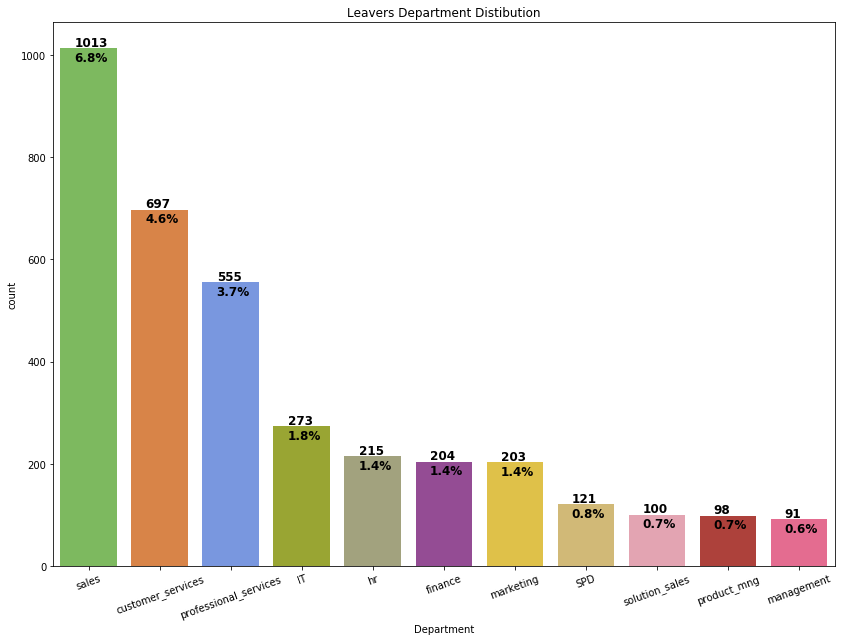

In [33]:
fig, axs = plt.subplots(figsize=(14, 10))
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']
department_plt = sns.countplot(x='Department',data=leaversdf, order =leaversdf['Department'].value_counts().index,palette=color_types)
annotate_bars(bar_plt=department_plt, bar_plt_var=df['Department'], x_offset=0.2, y_offset=25, txt_color="black")
plt.title('Leavers Department Distibution')
plt.xticks(rotation=20)


In [37]:
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
 
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')


<h2>Data Model: Logistic Regression Analysis to predict *"Leavers"*


Logistic Regression commonly deals with the issue of how likely an observation is to belong to a group. This model is commonly used to predict the likelihood of an event occurring. 
In contrast to linear regression, the output of logistic regression is transformed with a logit function. This makes the output either 0 or 1. 
This is a useful model for our case since we are interested in predicting whether an employee will leave (0) or stay (1). 

Logistic regression predicts the outcome of the response variable through a set of other explanatory variables, also called predictors. In context of this domain, the value of our response variable is categorized into two forms: 0 (zero) or 1 (one). The value of 0 (zero) represents the probability of an employee not leaving the company and the value of 1 (one) represents the probability of an employee leaving the company.

Logistic Regression models the probability of ‘success’ as:

$$logit[w(x))]=ln(\frac{w(x)}{(1-w(x)})=β0+β1X1+β2X2…+βnXn$$

where w indicates the probability of an event (e.g.employee leaving ), and βi are the regression coefficients associated with the reference group and the xi explanatory variables. 

Solving for w(x) we get: 


$$e^{ln(\frac{w(x)}{(1-w(x)})}=e^{β0+β1X1+β2X2…+βnXn)}$$


$$\frac{w(x)}{(1-w(x)}=e^{β0+β1X1+β2X2…+βnXn)}$$

$$w(x)=(1+w(x)) \times e^{β0+β1X1+β2X2…+βnXn)}$$

$$w(x)=e^{β0+β1X1+β2X2…+βnXn)}+w(x)\times e^{β0+β1X1+β2X2…+βnXn)}$$

$$w(x)-w(x)\times e^{β0+β1X1+β2X2…+βnXn)}=e^{β0+β1X1+β2X2…+βnXn)}$$


$$w(x)=(\frac{exp(β0+β1x1+β2X2…+βnXn)}{(1-exp(β0+β1x1+β2X2…+βnXn)})$$

in more simple words In other words, the logistic regression model predicts P(w=1) as a function of x.




<h4>Reggression Classification Report and Confusion Matrix

In [64]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
df2=df[['Employee Satisfaction','Performance Score','Years At Company','Left']]
df2['int'] = 1
X =df2[['Employee Satisfaction','Performance Score','Years At Company']]
y = df2['Left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15
                                                    ,random_state=0)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.92      0.85      1716
          1       0.49      0.25      0.33       534

avg / total       0.72      0.76      0.73      2250

[[1572  144]
 [ 398  136]]


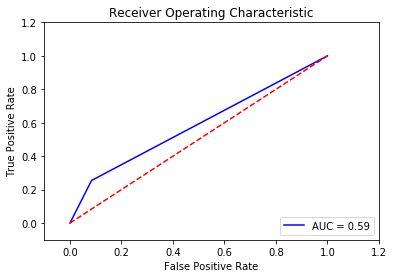

array([ 0.        ,  0.08391608,  1.        ])

In [65]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
false_positive_rate

In [66]:
#import io
#from pprint import pprint
#classification_report(y_test,predictions)
#from pandas.compat import StringIO
#df = pd.read_csv(io.StringIO(classification_report(y_test,predictions)),header=None, delimiter='\n' , engine='python')
#df

The result is telling us that we have 1572+136=1708 correct predictions and 398+144=542 incorrect predictions.
Even if the logistic regression is a simple model around 76% of the observation are correctly classified!

So, as a starting point, we're predicting with 76% accuracy. At first glance, that's not too bad! But our precision and recall metrics tell a different story. Since we're interested in accurately predicting who leaves the company, let's focus on line '1' (the second line) from the precision/recall table . Our precision score is only 0.49. This means that among all of the people we predict will leave (positive predictions), only 49% of them actually do. The problem is that we're getting too many false-positives.

Our recall figure is even worse. (In some fields, recall is also known as 'sensitivity'). Among all the people that actually left the company (i.e., the ground truth), we're identifying only 25% of them! Here we have way too many false negatives.

How could our overall accuracy be so high despite such low precision and recall? Our 76% accuracy score is likely due to the fact that we have imbalanced data. In our sample, only 24% of people leave. Thus, by simply predicting that everyone stays, we could get an overall accuracy of about 76%. The other 24% would be false negatives.



Coefficients for our Model:

In [67]:
data=logmodel.coef_
columns=X_train.columns
coef = pd.DataFrame(data ,columns=columns)
coef.T

,0
Employee Satisfaction,-3.705361
Performance Score,0.315923
Years At Company,0.171580


and the intercept:

In [68]:
data2=logmodel.intercept_
columns=(['Intercept'])
inter = pd.DataFrame(data2,columns=columns)
inter

,Intercept
0,0.071476


If we can live with the accuracy and predictive power of our model :

In [69]:
#for idx, col_name in enumerate(X_train.columns):
    #print("The coefficient for {} is {}".format(col_name, logmodel.coef_[0][idx]))

In [70]:
#intercept = logmodel.intercept_[0]

#print("The intercept for our model is {}".format(intercept))

Now we can define an equation calculating the probability that an employee will leave.



    
$$logit[Employee Turnover Score))]=(-3.705361) \times Satisfaction + (0.315923) \times Evaluation + (0.171580) \times YearsAtCompany + 0.0714766$$


The values above are the coefficient assigned to each independent variable. The constant 0.071476 represents the effect of all uncontrollable variables.

In [71]:
#logmodel.predict_proba([[0.8,0.8,10]])[0][1]

In [72]:
#def Employee_Turnover(S,E,Y):
   # v=S*(-3.705361)+E*(0.315923)+Y*(0.171580)+0.07147575137419754
    #t=np.exp(v) / (1+np.exp(v))
    #return t

    

In [73]:
#Employee_Turnover(0.8,0.8,10)

Using the above equation we can have the Probability of leaving as part of our dataset

In [74]:
#Employee_Turnover2(0.38,0.53,3)

In [75]:
df_withprob=df.copy()
df_withprob["Probability of Leaving "]=(df_withprob['Employee Satisfaction'].apply(lambda x: x*-3.705361)+df_withprob['Performance Score'].apply(lambda x: x*0.315923)+df_withprob['Years At Company'].apply(lambda x: x*0.171580)+0.07147575137419754)
df_withprob["Probability of Leaving "]=df_withprob["Probability of Leaving' "].apply(lambda x:np.exp(x)/(1+np.exp(x)))
df_withprob
#a=df_withprob.loc[df_withprob["Probability of Leaving "]>0.5]
#a
dftest=df_withprob.copy()
dftest["PCorrellation"]=dftest['Employee Satisfaction'].apply(lambda x:np.corr(x))

KeyError: "Probability of Leaving' "

We can use the above probabilities to create bands act accordingly taking action that wil prevent employee turnover

In [76]:
#import statsmodels.api as sm
#from numpy import nanmean
#import scipy as sc
#import scipy.stats
#from scipy import stats

#stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

#from scipy import stats
#logit = sm.Logit(df2['Left'],df2[['Employee Satisfaction','Performance Score','Years At Company']])
#logit=sm.Logit(y_train,X_train)
#result = logit.fit()
#result.params
#print(result.summary())

In [77]:
#The p-values for most of the variables are smaller than 0.05, therefore, most of them are significant to the model.

In [78]:
#from sklearn.cross_validation import cross_val_score
#scores = cross_val_score(LogisticRegression(), X_test, y_test, scoring='accuracy', cv=10)
#print (scores)
#print (scores.mean())

<h3>other things we can do:

*extracting correllation figures for a selected variable ex. "Left"*

In [79]:
#Extract 'left' column, because 'left' is our target value
corr_left = pd.DataFrame(df.corr()['Left'].drop('Left'))
corr_left.sort_values(by = 'Left', ascending = False)

,Left
Years At Company,0.144675
Average Monthly Hours,0.071225
Projects,0.023637
Performance Score,0.006427
Promotion,-0.061771
Employee Satisfaction,-0.388480


*create pivot_tables for selected variables and measures. eg. Median Employee Satisfation and Performance Score per Department*

In [80]:
pivot=pd.pivot_table(df,values = ['Employee Satisfaction', 'Performance Score'],index = ['Department'],
               columns = [],aggfunc=[np.median], 
                        margins=True).fillna('')
#cm = sns.light_palette("cyan", as_cmap=True)

pivot



median                  
                      Employee Satisfaction Performance Score
Department                                                   
IT                                    0.660             0.720
SPD                                   0.650             0.710
customer_services                     0.640             0.730
finance                               0.610             0.730
hr                                    0.610             0.720
management                            0.655             0.730
marketing                             0.640             0.710
product_mng                           0.640             0.700
professional_services                 0.650             0.740
sales                                 0.640             0.700
solution_sales                        0.650             0.735
All                                   0.640             0.720

*create cross tabs between selected variables eg left vs Stay per Department and Promotion*

In [81]:

cross=pd.crosstab([df.Department,df.Promotion],df.Left)
cross

Left                                0     1
Department            Promotion            
IT                    0           954   270
                      1             0     3
SPD                   0           639   121
                      1            27     0
customer_services     0          1998   694
                      1            25     3
finance               0           549   204
                      1            14     0
hr                    0           509   215
                      1            15     0
management            0           473    88
                      1            66     3
marketing             0           612   203
                      1            43     0
product_mng           0           402    98
professional_services 0          1657   552
                      1            17     3
sales                 0          3034  1006
                      1            93     7
solution_sales        0           302   100

*explore to see if we can have interactive charts in  the analysis*

In [82]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook 
# prepare some data
# for a bar chart, the y axis positions where there are bars are storedin a list # the length of each bar is in a second list in corresponding order
x=[1,2,3]
bar_lengths=[4,5,6]
 # create a new plot with a title and axis labels
plot = figure(title="Example of a vertical bar chart")
 
 #render the vertical bars, with bars at the specified x values
 #note that colors of any glyph can be represented by hexadecimal color codes
plot.vbar(x, bottom=0, top=bar_lengths, width=0.5, color="#CAB2D6")
 
 # output to static HTML file. 
#output_file("vertical_bar.html", mode="inline")
output_notebook() 
 #pop open in the browser
show(plot)

Loading BokehJS ...

In [53]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
 
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')
